# Target: 

get m_bl using *best pair* with *minimax algorithm*

1. $m_{bl}^{minimax}  = min(max(m_{b1l1},m_{b2l1}), max(m_{b1l2},m_{b2l2}))$

or

2. $m_{bl}^{minimax}  = min(max(m_{b1l1},m_{b2l2}), max(m_{b1l2},m_{b2l1}))$


In [1]:
import sys, os
sys.path.append(os.path.abspath("/afs/desy.de/user/z/zhuxinyu/public/mass_reco/"))
import numpy as np
import ROOT
from ROOT import TCanvas, TLegend, TFile, TPaveLabel, TPaveText, TTree, TLorentzVector, TH1D, TVectorT, gStyle, THStack, gPad, TH2D
from ROOT import gROOT
import helper

Welcome to JupyROOT 6.24/08


In [2]:
# 1. get tfile
filename = "user.cgarvey.32744802._000002.output.root"
file = TFile(filename)
# 2. get ttree
nominal = file.Get("nominal")

In [3]:
# 3. def TH1 to fill
m_bl1  = TH1D ("m_bl1 ","invariant mass of bl pair by minimax" ,50 ,0 ,300)
m_bl2  = TH1D ("m_bl2 ","invariant mass of left bl pair" , 50 ,0 ,300)
m_lb   = TH2D ("m_lb", "masses of two lb pairs (fix l for max lb)", 50 ,0 ,300, 50 ,0 ,300)
m_bl   = TH2D ("m_bl", "masses of two lb pairs (fix b for max bl)", 50 ,0 ,300, 50 ,0 ,300)

In [4]:
# reset the TH1 before starting fill, so that previous running of this cell won't affect the result
m_bl1.Reset()
m_bl2.Reset()
m_lb.Reset()
m_bl.Reset()

# analysis events

In [5]:
# for n in range(nominal.GetEntries()):
for n in range(5000):
    nominal.GetEntry(n)
    p4s_lep = helper.GetLorenzP4List(nominal,'lep')
    p4s_bjet = helper.GetLorenzP4List(nominal,'bjet')
    if len(p4s_lep) != 2 or len(p4s_bjet) != 2: continue
    
    # idx_l, idx_b = helper.minimax(p4s_lep, p4s_bjet)
    idx_l, idx_b = helper.minimax_cross(p4s_lep, p4s_bjet)
    
    # th1d
    # mass for minimax pair
    m_bl1.Fill((p4s_lep[idx_l] + p4s_bjet[idx_b]).M()/1000)
    # mass for the pair left
    m_bl2.Fill((p4s_lep[1 - idx_l] + p4s_bjet[1 - idx_b]).M()/1000)

    #th2d
    # x-axis for minimax pair, y for left out pair
    m_lb.Fill((p4s_lep[idx_l] + p4s_bjet[idx_b]).M()/1000, (p4s_lep[1 - idx_l] + p4s_bjet[1 - idx_b]).M()/1000)

    # # another algorithms, fix b first
    # idx_b, idx_l = helper.minimax(p4s_bjet, p4s_lep)
    # # x-axis for minimax pair, y for another pair
    # m_bl.Fill((p4s_lep[idx_l] + p4s_bjet[idx_b]).M()/1000, (p4s_lep[1 - idx_l] + p4s_bjet[1 - idx_b]).M()/1000)


# plot

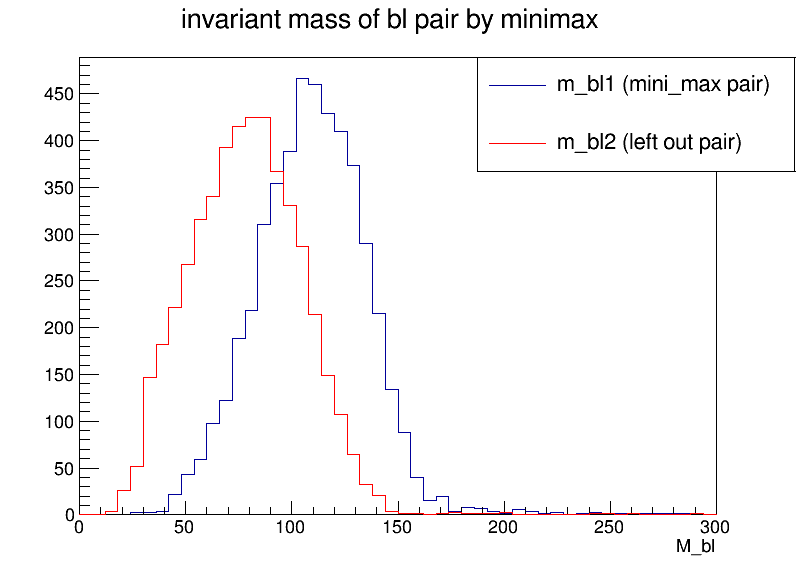

In [6]:
c1 = TCanvas('c1', 'canvas1', 0, 0, 800, 600 )
gStyle.SetOptStat(0)
m_bl1.Draw()
m_bl1.GetXaxis().SetTitle("M_bl")

m_bl2.SetLineColorAlpha(2, 1)
m_bl2.Draw('same')
leg = TLegend(0.6,0.7,1,0.9)
leg.AddEntry(m_bl1,"m_bl1 (mini_max pair)","l")
leg.AddEntry(m_bl2,"m_bl2 (left out pair)","l")
leg.Draw()
c1.Draw()


# th2d plot

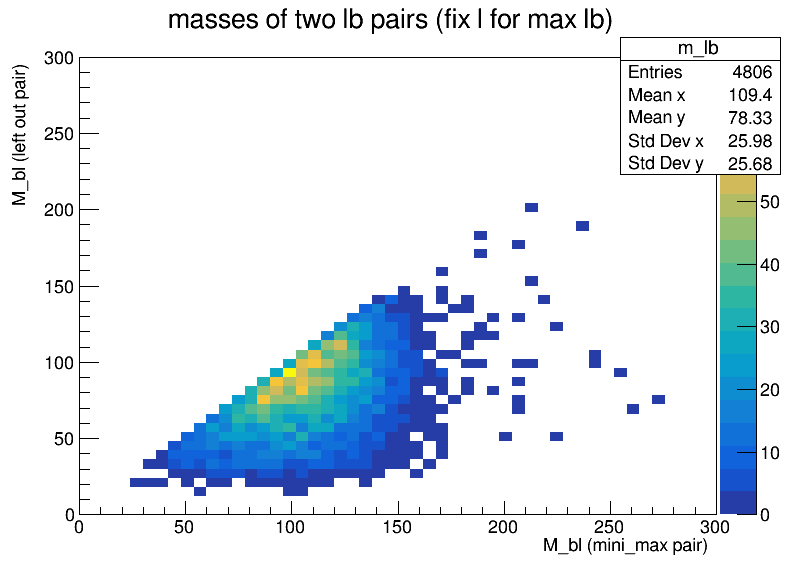

In [7]:
c2 = TCanvas('c2', 'canvas2', 0, 0, 800, 600 )
gStyle.SetOptStat(1) # delete default legend for TH1

m_lb.Draw("COLZ")
m_lb.GetXaxis().SetTitle("M_bl (mini_max pair)")
m_lb.GetYaxis().SetTitle("M_bl (left out pair)")


c2.Draw()


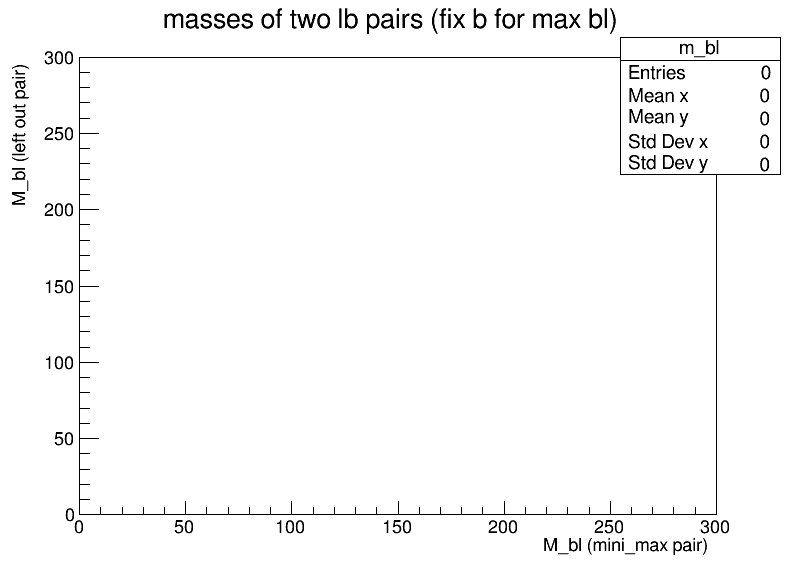

In [8]:
c3 = TCanvas('c3', 'canvas3', 0, 0, 800, 600 )
gStyle.SetOptStat(1) # delete default legend for TH1
m_bl.Draw("COLZ")
m_bl.GetXaxis().SetTitle("M_bl (mini_max pair)")
m_bl.GetYaxis().SetTitle("M_bl (left out pair)")


c3.Draw()

In [9]:
# for test
for n in range(4):
    nominal.GetEntry(n)

    p4s_el = helper.GetLorenzP4List(nominal,'el')
    p4s_mu = helper.GetLorenzP4List(nominal,'mu')
    p4s_lep = helper.getp4s_lep(p4s_el, p4s_mu)
    p4s_bjet = helper.GetLorenzP4List(nominal,'bjet')

    masses = np.empty((2,2))
    for i, p4_l in enumerate(p4s_lep):
        for j, p4_bjet in enumerate(p4s_bjet):
            # get the max m_b?li, save the idx
            masses[i,j] = (p4_l + p4_bjet).M()/1000

    idx_l, idx_b = helper.minimax(p4s_lep, p4s_bjet)

    # if (p4s_lep[idx_l] + p4s_bjet[idx_b]).M() < (p4s_lep[1 - idx_l] + p4s_bjet[1 - idx_b]).M():
    print(masses)
    print(idx_l, idx_b)


[[ 231.92487437   59.04632516]
 [ 107.95549364  240.3034353 ]]
0 0
[[ 329.62113308   66.82117164]
 [  77.61794606  221.49245222]]
1 1
[[ 108.84366044   97.92594347]
 [ 264.01185648   78.84940178]]
0 0
[[  59.3695452   151.18765028]
 [ 163.82662138   72.54595111]]
0 1
